# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
dilatz = 0

In [3]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
filenames1 = ['ccbar0']
filenames1 = ['ccbar0','phi0']
filenames1 = ['ccbar_20M','phi0']
filenames1 = ['phi_new00','ccbar_new00','bbbar_new00']#,'ccbar_new00'
filenames2 = ['dalitz_25M_v0']
filenames2 = ['photon_100M_v0','photon_100M_v1']
filenames2 = ['photon_100M_new_v0','photon_100M_new_v1','photon_100M_new_v2']

filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 25000*50/500

In [4]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)
    data.loc[data['IsTrue0'] > -99, 'IsTrue0'] = 1

    for ifile in range(0,len(filenames2)):
        idata = pd.read_csv(filepath+f'{filenames2[ifile]}.csv')
        idata.loc[idata['IsTrue0'] > -99, 'IsTrue0'] = 0
        data = pd.concat([data,idata], sort=False)

    data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float16')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
        
    data = data[(data['Pt'] < 25) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] < 25) & (data['reconpt'] < 999)  ]
    if dilatz:
        data = data[(data['Pt'] < 5)  ]
    

    data.head()

/home/yoren/.local/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [5]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
4395726        3  5.433594  0.386230  1.698242  0.423828 -28.296875 -0.019730   
3708034        3  1.173828  3.646484  1.487305  3.474609  18.390625  0.087341   
3051863        3  6.296875 -0.291992  1.493164 -0.324463  17.281250  0.016449   
1823149        5  1.283203  1.073242  1.625977  0.915039 -12.101562  0.077820   
294953         8  0.710938 -0.106567  1.638672 -0.395752 -14.578125  0.145264   

            Ecore  Centrality  Charge  ...  SecondHitPhiL2  SecondHitTheR2  \
4395726  5.703125          59       1  ...      -99.000000       -99.00000   
3708034  1.078125          30      -1  ...       14.460938       -99.00000   
3051863  6.023438          41      -1  ...      -99.000000        35.65625   
1823149  1.414062          15      -1  ...       18.359375         0.00000   
294953   0.658691          31      -1  ...      -99.000000         0.00000   

         SecondHitTheL2     sdphi3     sdthe3  IsTrue3  SecondHitPhiR3  \
4395726      -99.000000  -1.061523  -0.209229        1      -513.50000   
3708034       10.437500   1.360352   0.501465        0       -20.46875   
3051863      -99.000000 -10.000000 -10.000000        0       -99.00000   
1823149       -6.089844 -10.000000 -10.000000        0       -99.00000   
294953       -99.000000  -1.054688   1.401367        1        -0.00000   

         SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  
4395726      -99.000000       71.750000      -99.000000  
3708034       10.796875        7.863281       12.031250  
3051863        0.125122      -99.000000      -14.609375  
1823149      -99.000000      -99.000000      -99.000000  
294953       -99.000000        0.000000      -99.000000  

[5 rows x 48 columns]

In [6]:
print(data.size, data.shape)

672401856 (14008372, 48)


In [7]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','sdphi0','sdphi1','sdphi2','sdphi3','sdthe0','sdthe1','sdthe2','sdthe3','reconphi0','reconthe0'])

In [8]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore' ]):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


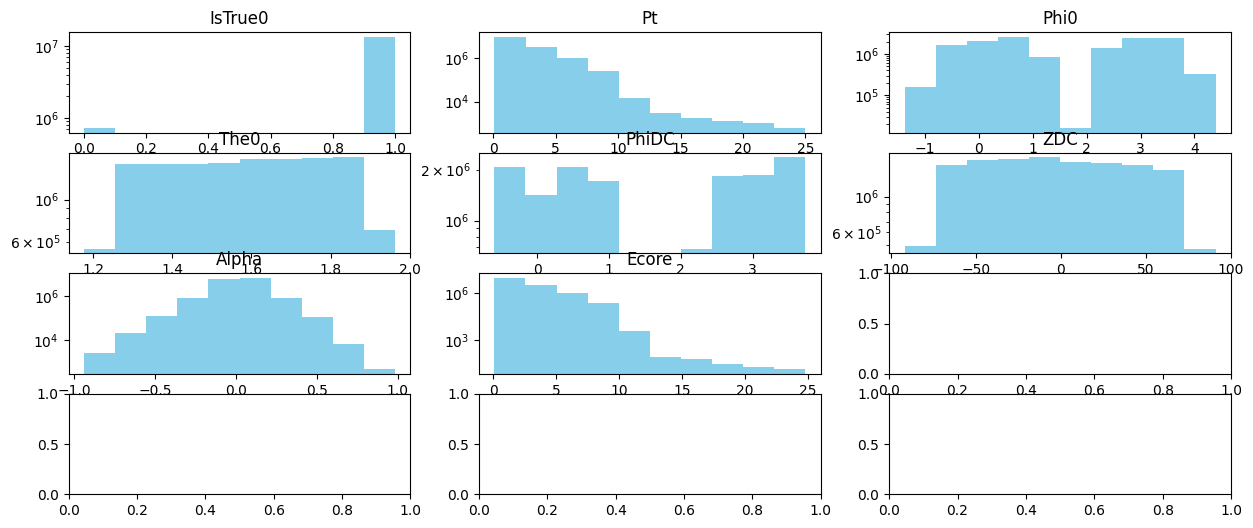

In [9]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [10]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/3)
    cut_off_test = int (data.shape[0]/3*2 + 1)

    print(cut_off_val,cut_off_test)

    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test,cut_off_val

In [11]:
X_train_all, X_test, y_train_all, y_test, cut_off_val = feature_engineering(data)

4669457 9338915


In [12]:
X_test

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
2572810        3  0.545898  2.574219  1.860352  2.966797 -64.312500 -0.203369   
289343         2  0.575195 -0.084473  1.579102 -0.439697  -1.456055  0.177124   
69731          4  0.415283  3.085938  1.459961  2.587891  24.000000  0.247681   
206888         5  0.385986  2.181641  1.469727  2.716797  22.609375 -0.266357   
5825521        4  1.428711  1.074219  1.194336  0.923828  86.812500  0.079346   
...          ...       ...       ...       ...       ...        ...       ...   
1720628        2  1.744141 -0.685059  1.739258 -0.564941 -37.468750 -0.060364   
250167         1  0.991211  2.779297  1.598633  2.572266  -6.015625  0.101868   
5378253        1  5.335938  3.326172  1.274414  3.285156  67.750000  0.021637   
162603        13  0.649902  0.428223  1.545898  0.115051   5.480469  0.155518   
1623999        3  4.832031  0.028442  1.919922 -0.015869 -80.687500  0.023590   

            Ecore  Centrality  Charge  ...  SecondHitTheR1  SecondHitTheL1  \
2572810  0.578125          78       1  ...      -99.000000      -99.000000   
289343   0.569336          47      -1  ...      -99.000000      -99.000000   
69731    0.522461           6      -1  ...       10.687500      -99.000000   
206888   0.225952           4       1  ...      -12.117188      -12.875000   
5825521  1.380859          24      -1  ...        9.695312       16.218750   
...           ...         ...     ...  ...             ...             ...   
1720628  1.646484          77       1  ...      -99.000000      -99.000000   
250167   0.876465           2      -1  ...        0.000000      -20.718750   
5378253  5.144531          69      -1  ...       13.820312      -99.000000   
162603   0.619141           7      -1  ...        5.691406        5.664062   
1623999  4.890625          46      -1  ...       10.703125        9.851562   

         SecondHitPhiR2  SecondHitPhiL2  SecondHitTheR2  SecondHitTheL2  \
2572810      -99.000000      -99.000000      -99.000000      -99.000000   
289343       412.250000      411.250000      -58.625000      -57.687500   
69731         -5.089844      -99.000000        8.937500      -99.000000   
206888         0.000000      -99.000000       31.765625      -99.000000   
5825521        7.214844        2.568359        9.007812        8.523438   
...                 ...             ...             ...             ...   
1720628        0.000000      -99.000000       -3.273438      -99.000000   
250167        -0.000000      -99.000000        0.000000      -99.000000   
5378253      -43.250000      -99.000000       13.117188      -99.000000   
162603        -0.000000        9.765625        0.000000        5.445312   
1623999      -20.828125       54.281250       -3.910156        2.535156   

         SecondHitPhiR3  SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  
2572810      -99.000000      -99.000000      -99.000000      -99.000000  
289343        34.500000       32.062500       -0.925781        0.364990  
69731         -6.300781        7.734375       10.515625       -2.791016  
206888       -99.000000        9.406250      -99.000000      -11.187500  
5825521      -99.000000      -99.000000      -99.000000      -99.000000  
...                 ...             ...             ...             ...  
1720628      -99.000000      -99.000000      -99.000000      -99.000000  
250167       -99.000000      -99.000000      -99.000000      -99.000000  
5378253      -99.000000      100.687500      -99.000000       39.062500  
162603       -99.000000        6.757812      -99.000000      -12.039062  
1623999      -99.000000       54.312500      -99.000000      -13.289062  

[4669457 rows x 28 columns]

In [13]:
X_train, X_val = X_train_all[:cut_off_val], X_train_all[cut_off_val:]
y_train, y_val = y_train_all[:cut_off_val], y_train_all[cut_off_val:]
w_train, w_val = y_train-1, y_val-1
w_test = y_test-1
w_train_all = y_train_all - 1
w_train = w_train*(-hadron_weight)+1
w_val = w_val*(-hadron_weight)+1
w_test = w_test*(-hadron_weight)+1
w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [14]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.06      1.00      0.12    242506
           1       1.00      0.20      0.33   4426951

    accuracy                           0.24   4669457
   macro avg       0.53      0.60      0.23   4669457
weighted avg       0.95      0.24      0.32   4669457

confusion matrix
[[ 242471      35]
 [3541226  885725]]


In [15]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.01, 0.2],
    "min_samples_split": [0.01, 0.2],
    "max_depth":[12],
    "max_features":["log2","sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[20]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

KeyboardInterrupt: 

# Cross Validation

In [18]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.15      1.00      0.26    242506
           1       1.00      0.69      0.81   4426951

    accuracy                           0.70   4669457
   macro avg       0.57      0.84      0.54   4669457
weighted avg       0.96      0.70      0.79   4669457



In [19]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.017105097073896236
roc auc: 0.995650165132071
f1 score: 0.9886952239354566


Text(0.5, 1.0, 'ROC AUC Curve')

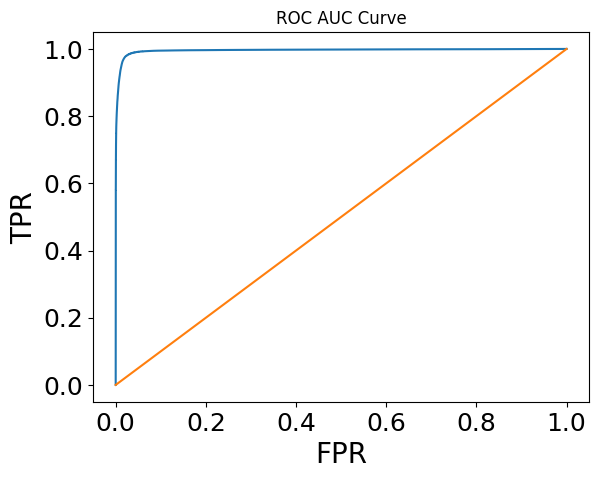

In [20]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [21]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.2041723933296676


In [76]:
i = 1000000
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.85 0.0048
0.15118069252499802 0.004045260735816846 0.8504596052678243


In [23]:
print(sum(predicted),len(predicted))

3038336 4669457


In [24]:
kek_data = data
kek_data = kek_data.drop(columns = ['IsTrue0'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.966291524342702


In [25]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Conv.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

Welcome to JupyROOT 6.30/06


In [26]:
mycute,mycuth, AIcute, AIcuth = 0, 0, 0, 0
norm_e, norm_h = 0, 0
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma, sigma_veto = 3, -2

counter =-1
for index, row in data0.iterrows():
    counter+=1
    if counter>4000000: break
    sdphi0, sdphi1, sdphi2, sdphi3 = 0, 0, 0, 0
    sdthe0, sdthe1, sdthe2, sdthe3 = 0, 0, 0, 0
    centrality, pt, IsTrue0 = row['Centrality'], row['Pt'], row['IsTrue0']

    if pt<0.4 or centrality<0: continue
    
    if IsTrue0: e_pt_hist_NC.Fill(pt,centrality)
    else:    h_pt_hist_NC.Fill(pt,centrality)
    if sdphi0>sigma_veto and ( abs(sdphi0) < sigma and abs(sdthe0) < sigma and abs(sdphi1) < sigma and abs(sdthe1) < sigma ) and ( ( abs(sdphi2) < sigma and abs(sdthe2) < sigma ) or ( abs(sdphi3) < sigma and abs(sdthe3) < sigma ) ):
        if IsTrue0: 
            mycute+=1
            e_pt_hist_SC.Fill(pt,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt,centrality)
    if proba_loc[counter][1]>thresholds[i]: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [27]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

3592265 388010142.0 1.0 1.0 0.867 0.005 0.006 0.005


In [28]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

166.757 0.867 0.005 5003


In [29]:
%run input/Format.ipynb

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


1161.0 14838.0


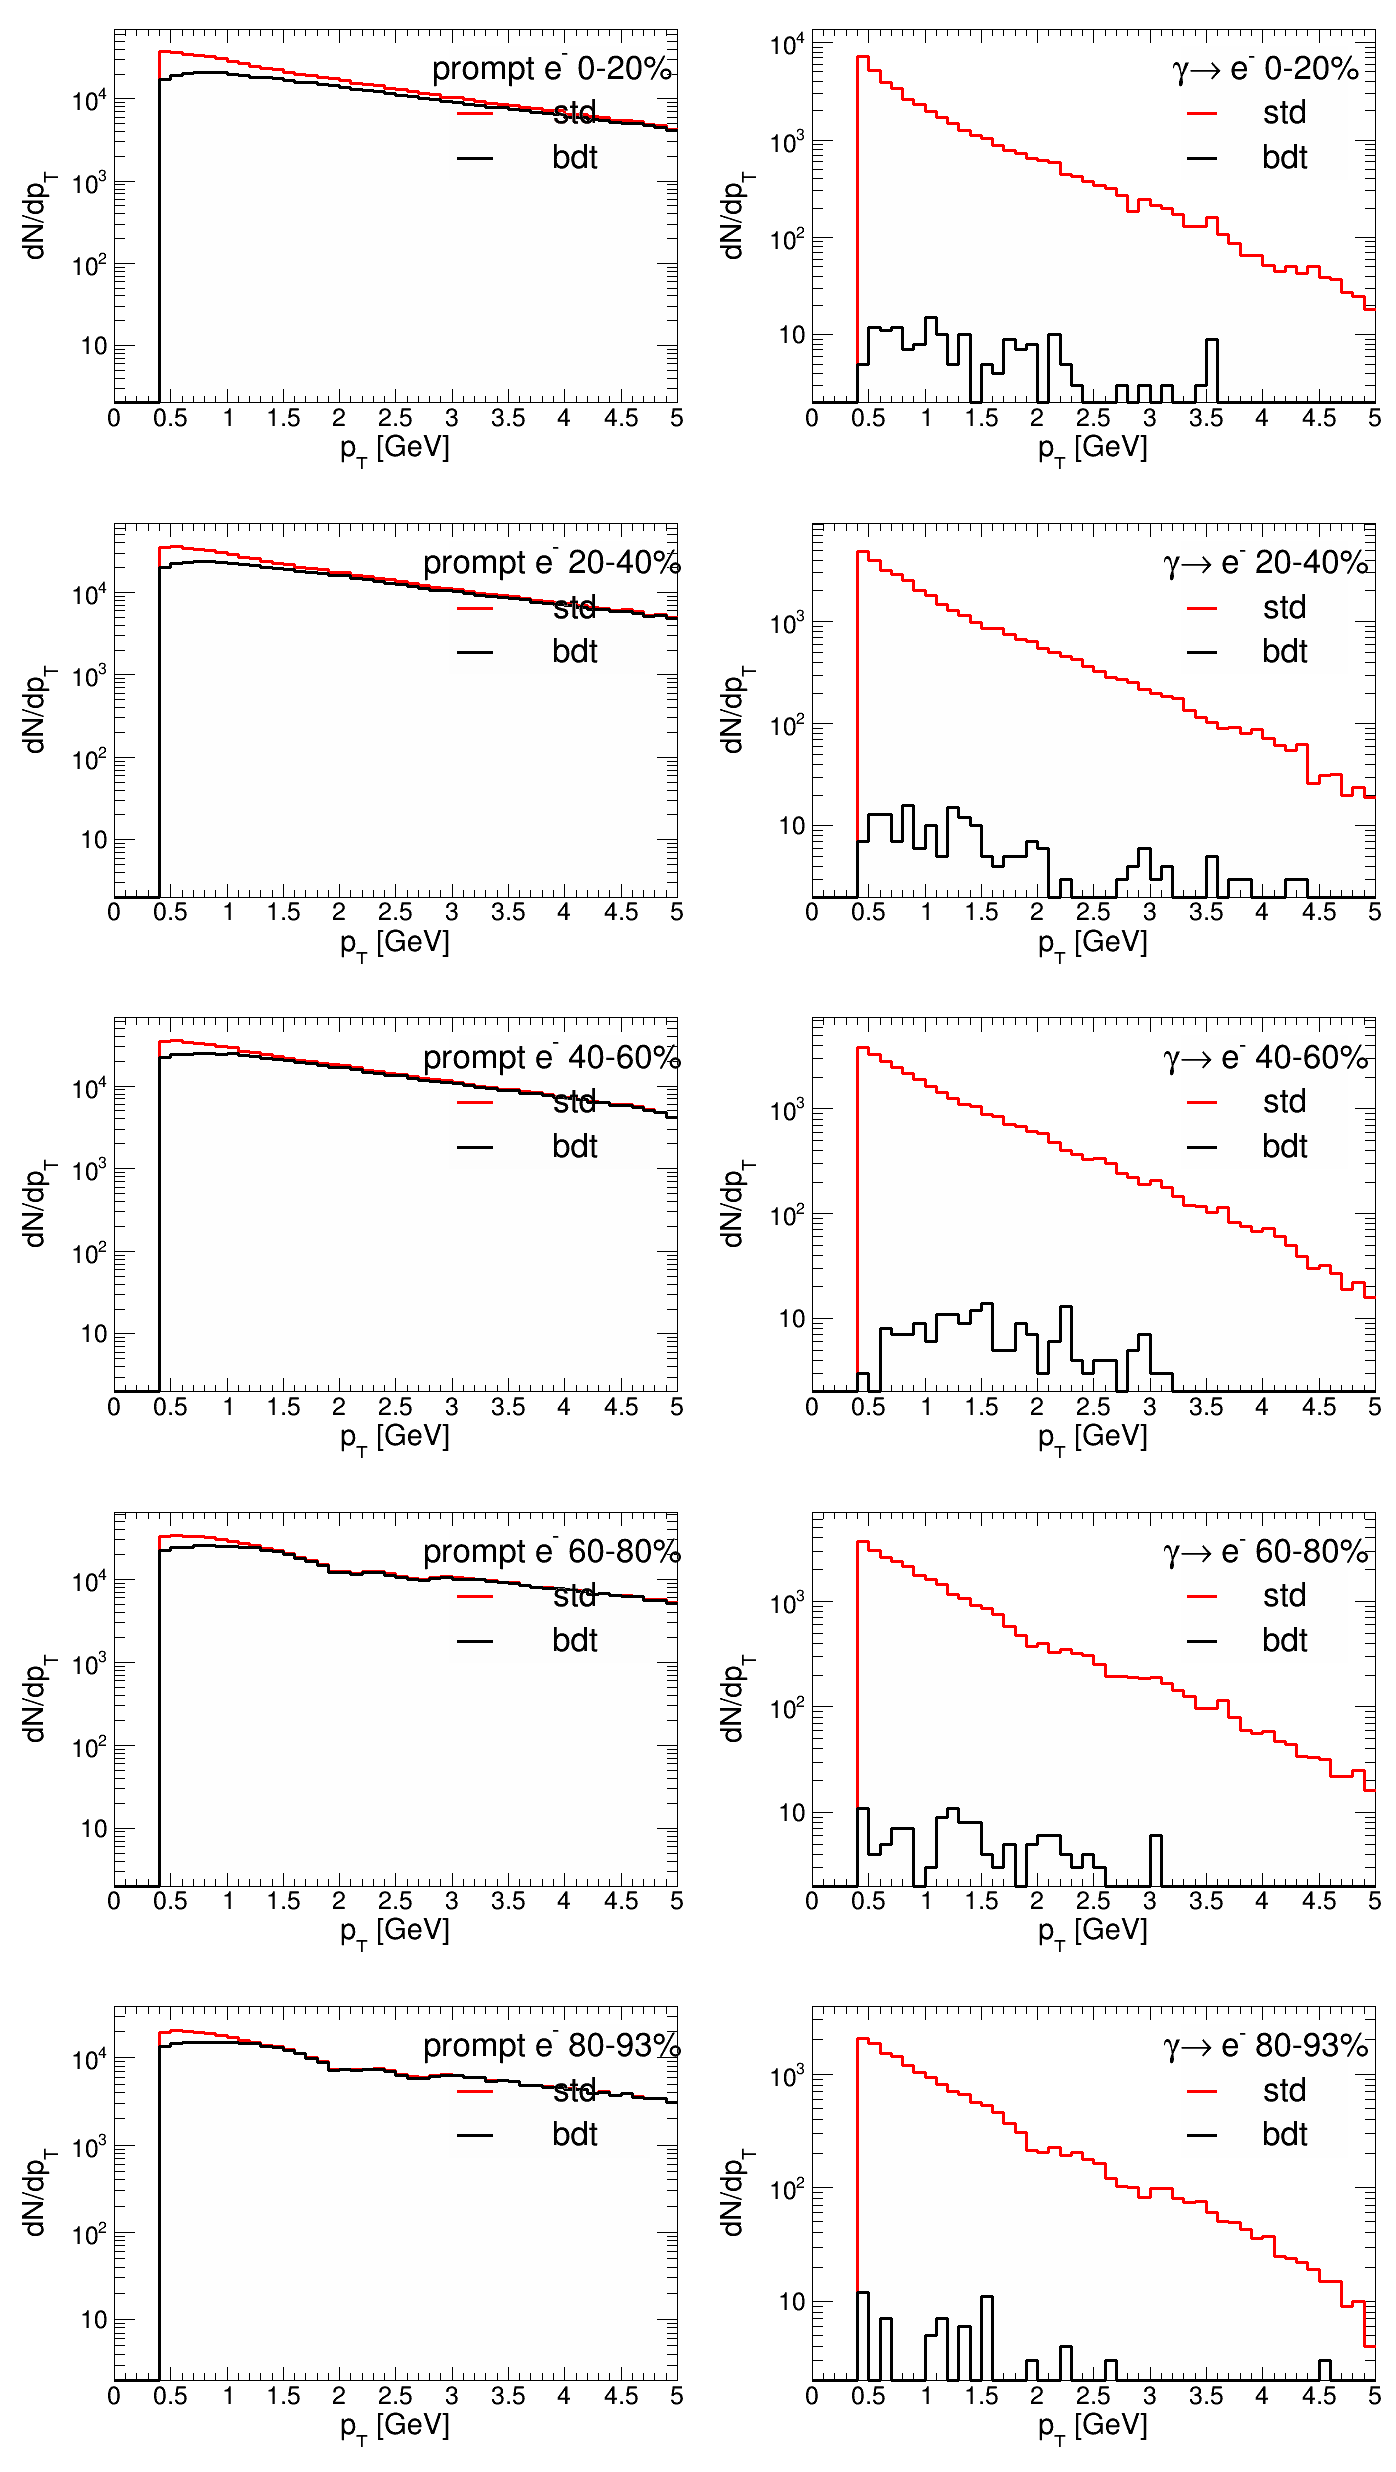

In [30]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(3)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(3)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(3)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(3)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(3)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(3)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    projh.Draw()
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))

In [31]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [32]:
import pickle
with open('output/bdt_conv.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[1 0 1 0 0 1 0 0 1 1]


In [33]:
import pickle
# load
with open('output/bdt_conv.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[1 0 1 0 0 1 0 0 1 1]


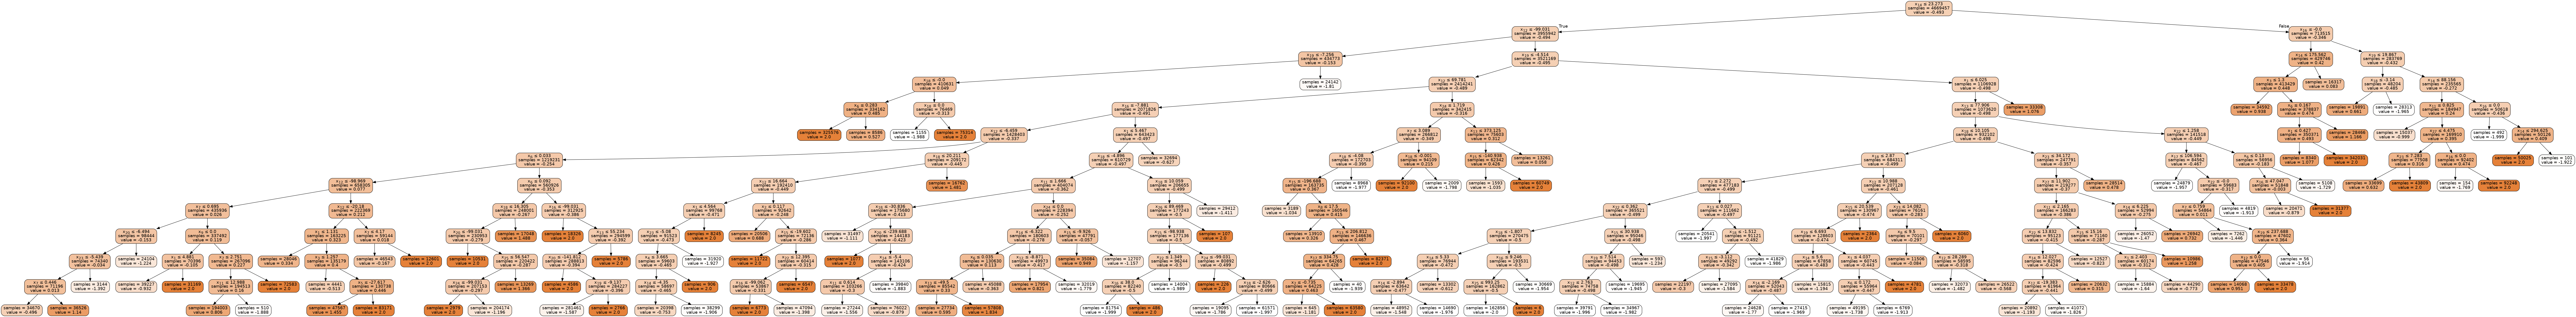

In [34]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [35]:
clf2.predict(kek_data[0:100])

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int32)

In [36]:
clf2.predict_proba(kek_data[0:100])

array([[0.03370848, 0.96629152],
       [0.54850083, 0.45149917],
       [0.01485224, 0.98514776],
       [0.62685928, 0.37314072],
       [0.92471775, 0.07528225],
       [0.36373106, 0.63626894],
       [0.77726982, 0.22273018],
       [0.88158173, 0.11841827],
       [0.07853684, 0.92146316],
       [0.03264352, 0.96735648],
       [0.07691688, 0.92308312],
       [0.0309569 , 0.9690431 ],
       [0.02684901, 0.97315099],
       [0.08724883, 0.91275117],
       [0.53376516, 0.46623484],
       [0.02271805, 0.97728195],
       [0.40957071, 0.59042929],
       [0.15755336, 0.84244664],
       [0.86006087, 0.13993913],
       [0.03201264, 0.96798736],
       [0.01410495, 0.98589505],
       [0.98627466, 0.01372534],
       [0.02138057, 0.97861943],
       [0.24685855, 0.75314145],
       [0.98938803, 0.01061197],
       [0.7472856 , 0.2527144 ],
       [0.01892328, 0.98107672],
       [0.02167521, 0.97832479],
       [0.71912486, 0.28087514],
       [0.92095653, 0.07904347],
       [0.

In [37]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 20}


In [38]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.03264352, 0.96735648],
       [0.07691688, 0.92308312],
       [0.0309569 , 0.9690431 ],
       [0.02684901, 0.97315099],
       [0.08724883, 0.91275117],
       [0.53376516, 0.46623484],
       [0.02271805, 0.97728195],
       [0.40957071, 0.59042929],
       [0.15755336, 0.84244664],
       [0.86006087, 0.13993913],
       [0.03201264, 0.96798736]])

In [39]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,10):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[ 2.00537561  1.01941421  2.66385466  2.24308322  1.57689254 -0.59354033
  2.51300923 -0.1574142   0.3753682  -1.51107281]
[-0.76539224 -4.83857537 -4.41835735 -4.27277826 -2.72200691 -3.9442107
  4.38102095 -4.63073164 -4.77378188 -3.34827844 -3.29572409]
[0.88136033 0.73485848 0.9348598  0.90405224 0.82876397 0.35582295
 0.9250488  0.46072751 0.59275549 0.18077986]


In [40]:
best_gbc = clf2.best_estimator_

In [41]:
n_estim = best_gbc.n_estimators

In [42]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[ 3.38892063  2.48499386  3.44371308  3.59031038  2.34769911 -0.1352665
  3.76161545  0.36574032  1.67654612 -1.8157956 ]
[0.96735648 0.92308312 0.9690431  0.97315099 0.91275117 0.46623484
 0.97728195 0.59042929 0.84244664 0.13993913]
0.2


In [43]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [44]:
print(log_odds_predictions)

[[2.0, 0.7318087318087318, 2.0, 2.0, 1.4549911925472605, -1.5561566371392148, 2.0, -1.110850406722404, 0.31544678940278403, -1.5865998074401217], [1.7321548603086683, 0.8368398238695287, 1.6891749759463086, 1.7321548603086683, 1.358693418966284, -0.6302666179673663, 1.6820573236110576, 0.12075571333247105, -1.409310118908006, -0.9785004284885696], [1.5468487146566345, -1.4525969611989908, 0.6497166395864249, 1.3027217906848727, -0.4695907645517442, 1.4805722249242312, 1.7039355178513655, -0.7328023077301232, -0.480486116787439, -0.9353906599720034], [1.355579420594422, -0.2644626903484372, 1.4303641806591836, -1.2061083943984294, 0.8709281360855454, -1.3549460697237732, 1.3835309225894128, 1.4303641806591836, -0.6165659529166013, -0.7121956579797847], [-1.0055816446684578, -0.0804503406102354, 0.9909349281597857, 1.320668309359905, 1.4979401370529621, 0.6011949262752512, 1.2935640178873753, 0.7489740816493565, 1.1013505232940675, -0.6378251672383369], [0.09214938487694217, 0.0921493848

In [45]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(10)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 2.005375611580884
[ 3.38892063  2.48499386  3.44371308  3.59031038  2.34769911 -0.1352665
  3.76161545  0.36574032  1.67654612 -1.8157956 ]


In [46]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

20
1
[[2.0, 1.7321548603086683, 1.5468487146566345, 1.355579420594422, -1.0055816446684578, 0.09214938487694217, 1.4017965883049281, 1.368939895341745, 0.22055873361180378, 1.3144321048777339, 1.1854287038907305, 1.340794950358275, 1.213088848812687, 1.1415105717534597, 1.1271608966471252, -0.37883477622646405, -0.0032740075697146208, 0.3203759201456821, 1.1308061980272286, -0.1593322256546914], [0.7318087318087318, 0.8368398238695287, -1.4525969611989908, -0.2644626903484372, -0.0804503406102354, 0.09214938487694217, 1.8692948999539285, 2.179139513940439, -0.7969627411710519, 1.9823114521326115, 1.4223486558633442, -0.19937856968063059, 0.31398805944498476, 1.1243441903025488, -0.5234940028010534, 1.7409670617378181, 0.19351450429552342, 2.8235307818248354, -0.533831686946679, 0.96590924912989], [2.0, 1.6891749759463086, 0.6497166395864249, 1.4303641806591836, 0.9909349281597857, 1.6035090796633142, 1.1325400352860409, 1.3561299803838498, 1.3427650166862988, 1.124138457400552, 1.12932

In [47]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [48]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [49]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[14] > 23.2734375) if (x[16] <= -1.4901161193847656e-07) if (x[14] <= 175.5625) if (x[3] > 1.30029296875) if (x[6] <= 0.16668701171875) if (x[1] > 0.4271240234375)   return 2.0;  // | based on 342,031 samples
        if  (x[14] <= 23.2734375) if (x[12] <= -99.03125) if (x[19] <= -7.255859375) if (x[18] <= -4.9442052841186523e-05) if (x[6] <= 0.2825927734375)   return 2.0;  // | based on 325,576 samples
        if  (x[14] <= 23.2734375) if (x[12] > -99.03125) if (x[19] <= -4.513671875) if (x[12] <= 69.78125) if (x[16] <= -7.880859375) if (x[12] <= -6.458984375) if (x[6] > 0.0334930419921875) if (x[6] > 0.092376708984375) if (x[16] > -99.03125) if (x[13] <= 55.234375) if (x[20] > -141.8125) if (x[19] <= -9.13671875)   return -1.5865998074401217;  // | based on 281,461 samples
        if  (x[14] <= 23.2734375) if (x[12] > -99.03125) if (x[19] <= -4.513671875) if (x[12] <= 69.78125) if (x[16] <= -7.880859375) if (x[12] <= -6.458984375) if (x[6] > 

In [50]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [51]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[14] > 23.2734375) and (x[16] <= -1.4901161193847656e-07) and (x[14] <= 175.5625) and (x[3] > 1.30029296875) and (x[6] <= 0.16668701171875) and (x[1] > 0.4271240234375) :  return 2.0  # | based on 342,031 samples
        if (x[14] <= 23.2734375) and (x[12] <= -99.03125) and (x[19] <= -7.255859375) and (x[18] <= -4.9442052841186523e-05) and (x[6] <= 0.2825927734375) :  return 2.0  # | based on 325,576 samples
        if (x[14] <= 23.2734375) and (x[12] > -99.03125) and (x[19] <= -4.513671875) and (x[12] <= 69.78125) and (x[16] <= -7.880859375) and (x[12] <= -6.458984375) and (x[6] > 0.0334930419921875) and (x[6] > 0.092376708984375) and (x[16] > -99.03125) and (x[13] <= 55.234375) and (x[20] > -141.8125) and (x[19] <= -9.13671875) :  return -1.5865998074401217  # | based on 281,461 samples
        if (x[14] <= 23.2734375) and (x[12] > -99.03125) and (x[19] <= -4.513671875) and (x[12] <= 69.78125) and (x[16] <= -7.880859375) and

In [ ]:
def mytree(x,y):
    return 0

In [63]:
def mygradboost (x, lerning_rate = 0.2):
    prob = 0
    for i in range (n_estim):
        prob+=lerning_rate*mytree(i, x)
    return 1. / ( 1. + np.exp( - prob ) )


In [64]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [65]:
kek_data[9:19].values.tolist()[0][27]

109.375

In [66]:
iestim = 19
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:10].values.tolist())
print(y)
print(kek_data[9+i:10+i].values.tolist()[0][15])
myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(1)]
print(myf)

[-0.15933223]
-99.0
[-0.15933222565469143]


In [67]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[[0.03264352 0.96735648]
 [0.07691688 0.92308312]
 [0.0309569  0.9690431 ]
 [0.02684901 0.97315099]
 [0.08724883 0.91275117]
 [0.53376516 0.46623484]
 [0.02271805 0.97728195]
 [0.40957071 0.59042929]
 [0.15755336 0.84244664]
 [0.86006087 0.13993913]]
[0.9673564775439076, 0.9230831155227598, 0.969043097089843, 0.9731509921458454, 0.9127511669085733, 0.4662348435478338, 0.9772819502711205, 0.5904292892468964, 0.8424466392486589, 0.13993913327254145]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [68]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['NBDThit', 'Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore', 'Centrality', 'Charge', 'Arm', 'reconpt', 'SecondHitPhiR0', 'SecondHitPhiL0', 'SecondHitTheR0', 'SecondHitTheL0', 'SecondHitPhiR1', 'SecondHitPhiL1', 'SecondHitTheR1', 'SecondHitTheL1', 'SecondHitPhiR2', 'SecondHitPhiL2', 'SecondHitTheR2', 'SecondHitTheL2', 'SecondHitPhiR3', 'SecondHitPhiL3', 'SecondHitTheR3', 'SecondHitTheL3']
28
